<h1>Project 0: Inaugural project </h1>


<b>Labor Supply Problem</b>

Following labor supply problem is given: 

$$
c^*,l^* = log(c) - v \frac{l^{1+\frac{1}{E}}}{1+\frac{1}{E}}
\\
x = m + wl - [\tau_0wl+\tau_1 \max(wl-\kappa,0)]\\

c \in [0,x]\\
l \in [0,1]\\

$$

Where: 
c is consumption,
l is labor supply,
m is cash-on-hand, 
w is the wage rate, 
$$t_0$$ is the standard labor income tax
$$t_1$$ is the top bracket labor income tax,
k is the cut-off of top labor income bracket
x is total resources
v scales disutility of labor 
E is the Frisch elasticity of labor supply
utility is monotonically increasing in consumption, which implies $$c^* = x$$

<h2>Question 1</h2>

In [1]:
# All used packages are imported

import numpy as np
import sympy as sm 
from scipy import optimize



In [6]:
t0 = sm.symbols('t_0')
t1 = sm.symbols('t_1')

In [4]:
m = 1 #cash-on-hand
v = 10 #disutility of labor
e = 0.3 #elasticity of labor supply
t0 = 0.4 #standard labor income tax
t1 = 0.1 #top bracket labor income tax
k = 0.4 #cut-off for top labor income tax


# Defining utility

def utility(c,v,l,e):
    u = np.log(c) - v*(l**(1+1/e)/(1+1/e))
    return u

# Defining constraint

def constraint(m,w,l,t0,t1,k):
    x = m + w*l - (t0*w*l + t1*np.max(w*l-k,0))
    return x


def consumption(l,w,e,v,t0,t1,k):
    c = constraint(m,w,l,t0,t1,k)
    return -utility(c,v,l,e)


def optimizer(w,e,v,t0,t1,k,m):
    res = optimize.minimize_scalar(
    consumption, method='bounded',
    bounds=(0,1), args=(w,e,v,t0,t1,k))
    
    labor_star = res.x
    cons_star = constraint(m,w,labor_star,t0,t1,k)
    utility_star = utility(cons_star,v,labor_star,e)
    
    return labor_star,cons_star,utility_star

labor_star = optimizer(0.5,e,v,t0,t1,k,m)[0]
cons_star = optimizer(0.5,e,v,t0,t1,k,m)[1]
u_star = optimizer(0.5,e,v,t0,t1,k,m)[2]

print('labour supply is:' + str(labor_star))
print('consumption is:' + str(cons_star))
print('utility:' +  str(u_star))

labour supply is:0.31961536193545265
consumption is:1.119903840483863
utility:0.09677772523865749


<h2>Question 2</h2>

<function matplotlib.pyplot.show(*args, **kw)>

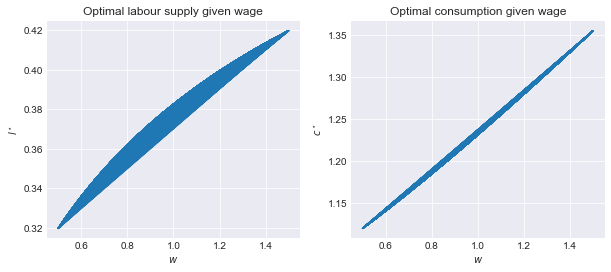

In [8]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

N = 5000
w_vector = np.random.uniform(0.5, 1.5, size = N)
l_optimal = np.empty(N)
c_optimal = np.empty(N) 

for i,w in enumerate(w_vector):
    opt = optimizer(w,e,v,t0,t1,k,m)
    l_optimal[i] = opt[0]
    c_optimal[i] = opt[1]

fig = plt.figure(figsize=(10,4))

ax_left = fig.add_subplot(1,2,1)

ax_left.plot(w_vector,l_optimal)

ax_left.set_title('Optimal labour supply given wage')
ax_left.set_xlabel('$w$')
ax_left.set_ylabel('$l^\star$')
ax_left.grid(True)

# c. right plot
ax_right = fig.add_subplot(1,2,2)

ax_right.plot(w_vector,c_optimal)

ax_right.set_title('Optimal consumption given wage')
ax_right.set_xlabel('$w$')
ax_right.set_ylabel('$c^\star$')
ax_right.grid(True)

plt.show
